In [ ]:
# Bài tập Thực hành cây quyết định

In [17]:
# Cau 1: Import thu vien
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [18]:
# Cau 2: đọc dữ liệu và lưu vào df
df = pd.read_csv('./drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [19]:
# 3. Kiểm tra thông tin du lieu, dùng hàm info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [20]:
# 4. Mô tả dữ liệu, dùng hàm describe
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [21]:
# 5. Kiểm tra dữ liệu, dùng types
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [22]:
# 6. Kiểm tra tên cột, dùng columns
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [23]:
#7. Kiểm tra dữ liệu trống, dùng df.isnull().sum()
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [24]:
#8. Kiểm tra dữ liệu trùng, dùng df.duplicated().sum()
print(df.duplicated().sum())


0


In [ ]:
# =============== Thao tac va hieu chinh

In [25]:
#9. Đổi tên cột phù hợp ngữ nghĩa
df.rename(columns= { 'Na_to_K': 'Sodium_to_Potassium', 'BP' : 'Bool_Pressure'}, inplace=True)

df['Sex'].replace({'M': 'Male', 'F': 'Female'},inplace=True)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype(int)




In [ ]:
# =============== Khao sat du lieu voi ky thuat EDA

In [26]:
# 10. Thống kê số lượng người thuộc nhóm tuổi cao nhất
age_value = df['Age'].value_counts()
top_age = age_value.head(5)
df_top_age = pd.DataFrame({ 'Age': top_age.index, 'Count': top_age.values })
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,39,6


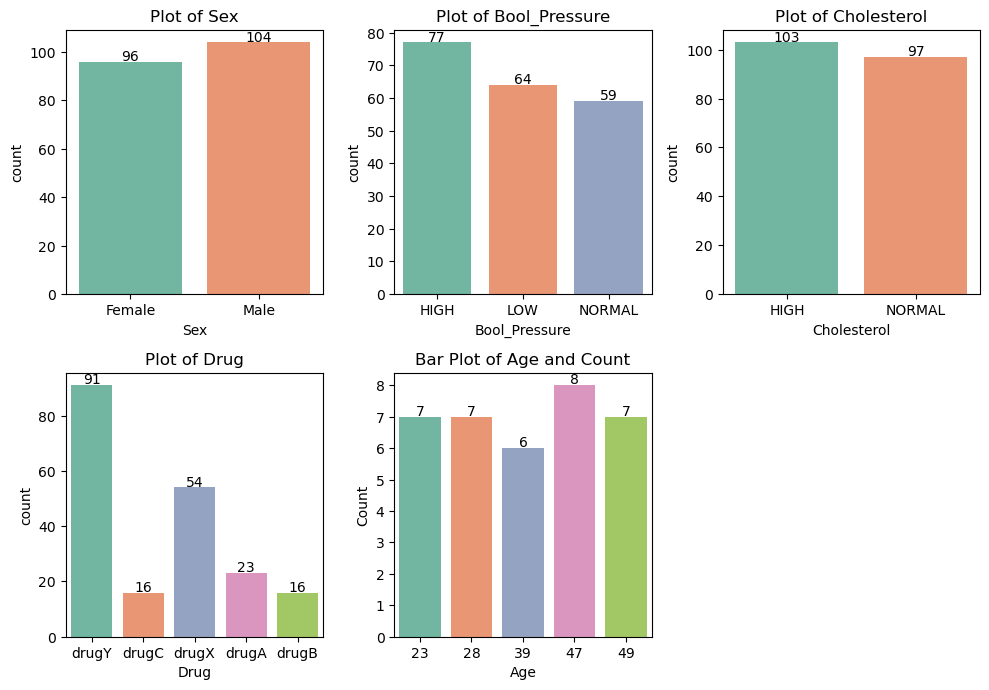

In [29]:
# 11. Tiến hành EDA dữ liệu. SInh viên quan sát các biểu đồ và cho nhận xét

# EDA
def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'):
    if plot_type == 'count':
        sns.countplot(x=x, data=data, palette=palette, ax=ax)
    elif plot_type == 'bar':
        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax)
    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar Plot of {x} and {y}')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width()/ 2., p.get_height()),
                    ha ='center', va = 'baseline',
                    fontsize=10, color= 'black',
                    xytext=(0,1),
                    textcoords='offset points')
# Create the figture and subplots
plt.figure(figsize=(10,10))

# Define plot configurations
plot_configs = [
    {'x': 'Sex', 'data': df, 'plot_type': 'count' },
    {'x': 'Bool_Pressure', 'data': df, 'plot_type': 'count' },
    {'x': 'Cholesterol', 'data': df, 'plot_type': 'count' },
    {'x': 'Drug', 'data': df, 'plot_type': 'count' },
    {'x': 'Age', 'y': 'Count',  'data': df_top_age, 'plot_type': 'bar' }

]

# Loop through plot configurations to create subplots
for i, config in enumerate(plot_configs):
    ax = plt.subplot(3, 3, i+1)
    create_plot(ax, **config)

plt.tight_layout()
plt.show()
                    
 

In [31]:
# Nhận xét:
# ---- Plot of Sex:
# Số lượng nam (104) nhiều hơn số lượng nữ (96), nhưng không có sự khác biệt lớn giữa hai giới.
# Điều này cho thấy dữ liệu về giới tính khá cân bằng giữa nam và nữ.
# ---- Plot of Blood Pressure:
# Phần lớn dữ liệu thuộc nhóm có huyết áp cao (HIGH) với 77 người, trong khi nhóm huyết áp thấp (LOW) và bình thường (NORMAL) có số lượng gần như tương đương, lần lượt là 64 và 59 người.
# Dữ liệu về huyết áp cho thấy tình trạng cao huyết áp là phổ biến hơn trong tập dữ liệu này.
# ---- Plot of Cholesterol:
# Số người có mức cholesterol cao (HIGH) là 103 người, chỉ nhỉnh hơn một chút so với số người có mức cholesterol bình thường (NORMAL) là 97 người.
# Dữ liệu về cholesterol cho thấy có sự cân bằng tương đối giữa hai nhóm, mặc dù nhóm cholesterol cao có nhỉnh hơn.
# ---- Plot of Drug:
# Thuốc "drugY" là loại được sử dụng nhiều nhất với 91 người, trong khi các loại thuốc khác như "drugC", "drugX", "drugA", và "drugB" có số lượng sử dụng ít hơn đáng kể.
# Điều này cho thấy "drugY" là loại thuốc phổ biến nhất trong dữ liệu, còn lại các thuốc khác có mức sử dụng rất hạn chế.
# ---- Bar Plot of Age and Count:
# Biểu đồ này cho thấy có sự phân bổ đồng đều giữa các nhóm tuổi từ 23 đến 49. Nhóm tuổi 47 có số lượng cao nhất (8 người), trong khi nhóm tuổi 39 có số lượng thấp nhất (6 người).
# Điều này cho thấy độ tuổi trong tập dữ liệu được phân bố khá đồng đều, với mỗi nhóm tuổi có sự khác biệt không quá lớn về số lượng.

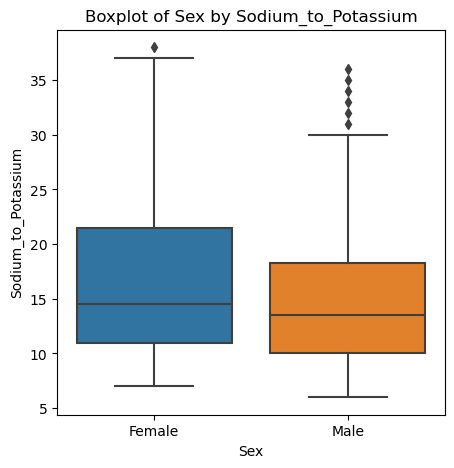

In [30]:
# 12. Tiến hành khảo sát dữ liệu outlier và cho nhận xét
plt.figure(figsize=(5,5))
sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df)
plt.title('Boxplot of Sex by Sodium_to_Potassium')  
plt.show()

In [ ]:
# Female (Nữ):
# Hộp boxplot cho thấy phân vị thứ 25 và 75 của tỷ lệ Sodium-to-Potassium nằm trong khoảng từ khoảng 9 đến 18.
# Giá trị trung vị (median) của nhóm nữ xấp xỉ khoảng 13.
# Có một số giá trị outlier (giá trị bất thường) cao hơn 30, cho thấy có một vài trường hợp có tỷ lệ Sodium-to-Potassium cao bất thường.
# Male (Nam):
# Phân vị thứ 25 và 75 của nhóm nam cũng tương đối gần với nhóm nữ, dao động từ khoảng 9 đến 17.
# Giá trị trung vị của nhóm nam cũng vào khoảng 13, tương tự như nhóm nữ.
# Tuy nhiên, nhóm nam có nhiều giá trị outlier hơn, với một số giá trị cao hơn 25, cho thấy có nhiều trường hợp có tỷ lệ Sodium-to-Potassium cao bất thường hơn so với nhóm nữ.

In [33]:
# 13.Tạo tập dữ liệu đặc trưng (feature) và mục tiêu (target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X)
print(y)

     Age     Sex Bool_Pressure Cholesterol  Sodium_to_Potassium
0     23  Female          HIGH        HIGH                   25
1     47    Male           LOW        HIGH                   13
2     47    Male           LOW        HIGH                   10
3     28  Female        NORMAL        HIGH                    8
4     61  Female           LOW        HIGH                   18
..   ...     ...           ...         ...                  ...
195   56  Female           LOW        HIGH                   12
196   16    Male           LOW        HIGH                   12
197   52    Male        NORMAL        HIGH                   10
198   23    Male        NORMAL      NORMAL                   14
199   40  Female           LOW      NORMAL                   11

[200 rows x 5 columns]
0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object


In [34]:
# 14. Tiến hành One Hot Encoder cho đặc trưng Sex và Label Encoder cho các categorical feature còn lại. Sinh viên giải thích tại sao làm như vậy?

# OneHotEncoder
onehot_encoder_sex = OneHotEncoder(sparse_output=False)
one_hot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns= onehot_encoder_sex.get_feature_names_out(['Sex']))
X = pd.concat([X, one_hot_df], axis=1)
X = X.drop('Sex', axis=1)

# LabelEncoder
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
X['Bool_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Bool_Pressure'])
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])


In [37]:
# 15. Phân tách tập dữ liệu train và test với tỉ lệ 60:40, hệ số ngẫu nhiên là 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [35]:
# 16.Xây dựng mô hình với các hyperparameter tunning (siêu tham số điều chỉnh mô hình) như sau: 
#criterion=”entropy”, max_depth=6 và lamx_leaf_nodes=10. Sinh viên giải thích các siêu tham số
dtc = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    min_samples_leaf=10,
    random_state=42
)


In [38]:
#17. Tiến hành huấn luyện (train) mô hình trên tập dữ liệu huấn luyện
dtc.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       random_state=42)

In [ ]:
#18. Hiện thị danh sách các lớp mục tiêu phân lớp

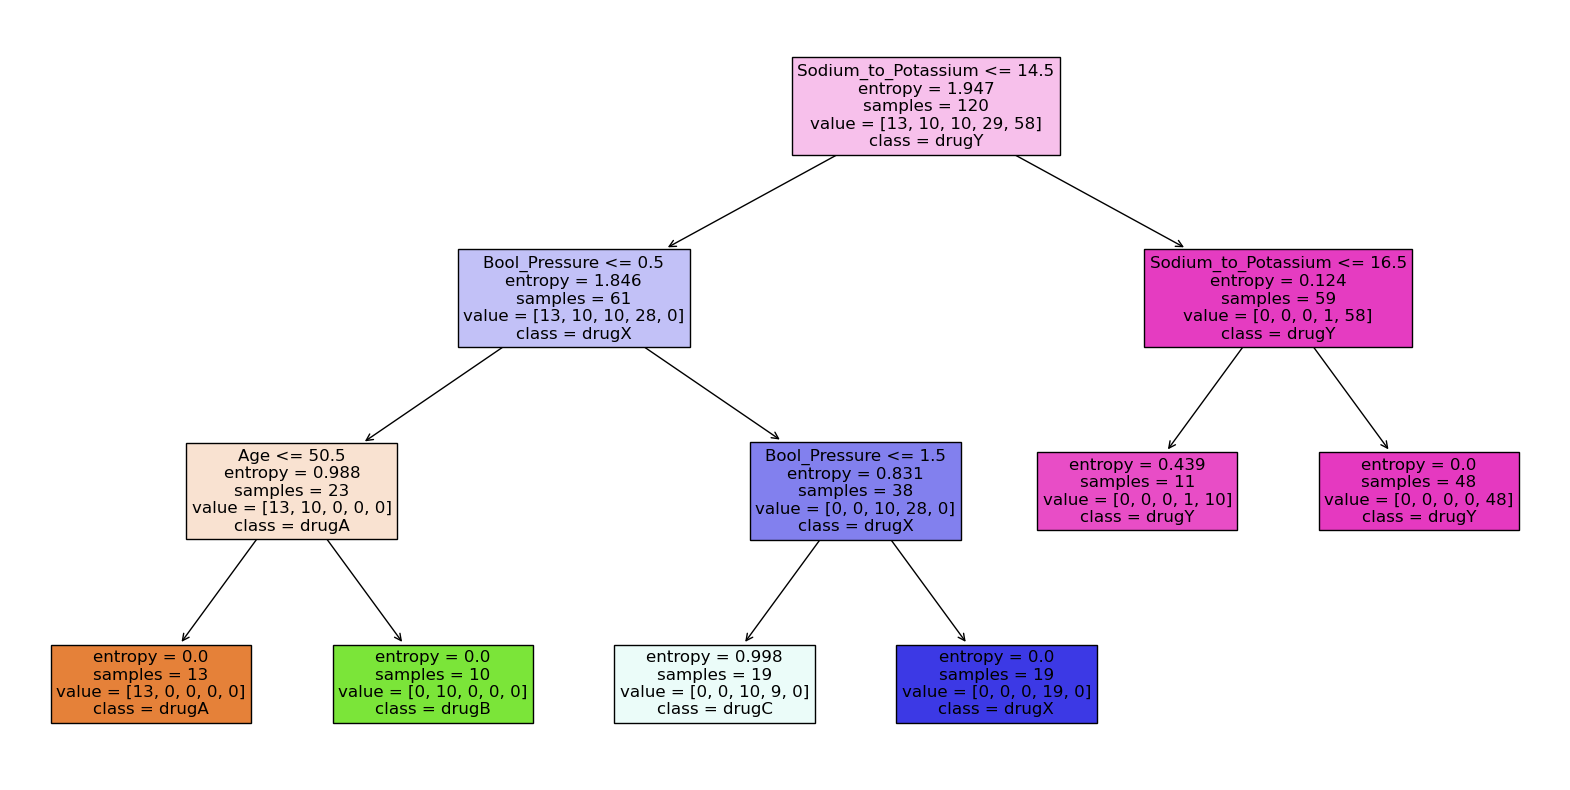

In [41]:
# 19. Vẽ sơ đồ mô hình cây phân lớp. Sinh viên giải thích các số liệu trên từng node và leaf
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Chuyển đổi feature_cols và class_names thành list
feature_cols = X_train.columns.tolist()
class_names = dtc.classes_.tolist()

plt.figure(figsize=(20,10))
plot_tree(dtc, class_names=class_names, feature_names=feature_cols, fontsize=12, filled=True) 
plt.show()




In [ ]:
# 20. Tính Entropy có trọng số (WE) và Information Gain khi phân tách Root thành Left – Right node


In [ ]:
# 21. Sinh viên tiến hành đánh giá dựa trên các độ đo
#a. Accuracy
#b. Confusion matrix


In [42]:
# 22. In ra bảng báo cáo các giá trị đánh giá theo từng nhóm thuốc phân lớp
from sklearn.metrics import classification_report

# Đặt tên cho các class
target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

# In báo cáo phân loại
print(classification_report(y_test, y_test_pred, target_names=target_names))


NameError: name 'y_test_pred' is not defined

In [43]:
# 23. 23. Xây dựng chương trình đề xuất hỗ trợ cấp thuốc cho bệnh nhân dựa trên các chỉ số Age, 
# Blood_Pressure, Cholesterol, Sodium_to_Potassium và Sex được nhập từ bàn phím. Hãy in ra kết 
# quả loại thuốc được cấp. Ví dụ: Age=32, Blood_Pressure=’HIGH’, Cholesterol=’NORMAL’, 
# Sodium_to_Potassium=13, Sex=’Female
# Giả sử bạn đã huấn luyện mô hình và đặt tên là `dtc` (DecisionTreeClassifier)
# Thư viện cần thiết
import numpy as np

# Dữ liệu đầu vào
age = int(input("Nhập Age: "))
blood_pressure = input("Nhập Blood Pressure (HIGH/LOW/NORMAL): ").upper()
cholesterol = input("Nhập Cholesterol (HIGH/LOW/NORMAL): ").upper()
sodium_to_potassium = float(input("Nhập Sodium to Potassium: "))
sex = input("Nhập Sex (Male/Female): ").capitalize()

# Chuyển đổi các đầu vào thành dạng mà mô hình có thể hiểu
# Giả sử mô hình đã được huấn luyện với các biến giả (one-hot encoding)
if blood_pressure == 'HIGH':
    bool_pressure = 1
else:
    bool_pressure = 0

if cholesterol == 'HIGH':
    cholesterol_value = 1
else:
    cholesterol_value = 0

if sex == 'Female':
    sex_female = 1
    sex_male = 0
else:
    sex_female = 0
    sex_male = 1

# Dữ liệu đầu vào cho mô hình
input_data = np.array([[age, bool_pressure, cholesterol_value, sodium_to_potassium, sex_female, sex_male]])

# Dự đoán loại thuốc
predicted_drug = dtc.predict(input_data)[0]

# In ra kết quả
print(f"Loại thuốc được cấp là: {predicted_drug}")


Loại thuốc được cấp là: drugY


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#24. Sinh viên điều chỉnh các siêu tham số trong mô hình như sau: max_depth chạy từ 2 đến 10 và 
# max_leaf_nodes chạy từ 2 đến 10. Sau đó, vẽ biểu đồ thể hiện sự thay đổi của độ đo accuracy. Từ
# đó đưa đến kết luận với siêu tham số điều chỉnh nào thì mô hình tốt nhất

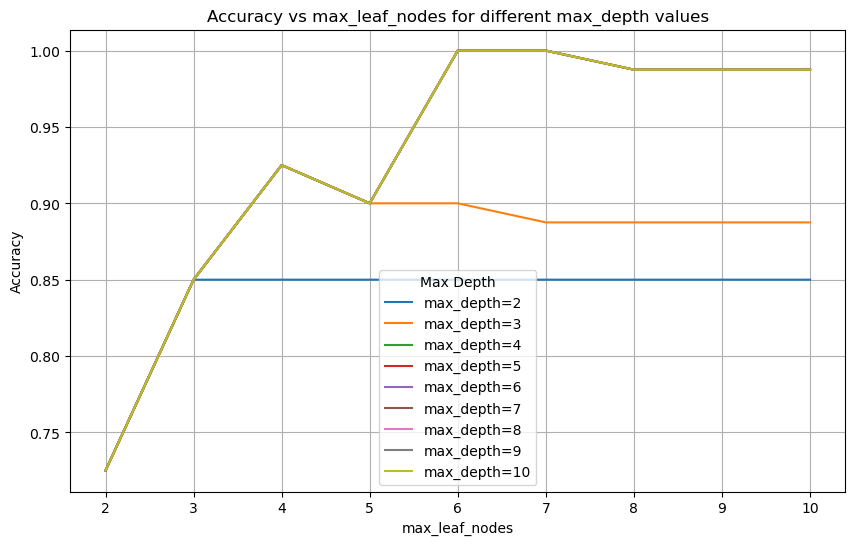

Mô hình tốt nhất với max_depth=4, max_leaf_nodes=6, accuracy=1.0000


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Giả sử bạn đã có X và y là các đặc trưng và nhãn tương ứng
# X_train, X_test, y_train, y_test đã được chia

# Khởi tạo danh sách để lưu độ chính xác
accuracy_results = []

# Chạy vòng lặp qua các giá trị của max_depth và max_leaf_nodes
for max_depth in range(2, 11):  # max_depth từ 2 đến 10
    for max_leaf_nodes in range(2, 11):  # max_leaf_nodes từ 2 đến 10
        # Khởi tạo mô hình với các siêu tham số hiện tại
        dtc = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
        # Huấn luyện mô hình
        dtc.fit(X_train, y_train)
        # Dự đoán trên tập test
        y_pred = dtc.predict(X_test)
        # Tính toán độ chính xác
        accuracy = accuracy_score(y_test, y_pred)
        # Lưu kết quả với tuple (max_depth, max_leaf_nodes, accuracy)
        accuracy_results.append((max_depth, max_leaf_nodes, accuracy))

# Chuyển kết quả sang dạng numpy array để dễ thao tác
accuracy_results = np.array(accuracy_results)

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
for max_depth in range(2, 11):
    # Lọc các kết quả cho max_depth cụ thể
    filtered_results = accuracy_results[accuracy_results[:, 0] == max_depth]
    plt.plot(filtered_results[:, 1], filtered_results[:, 2], label=f'max_depth={max_depth}')

plt.title('Accuracy vs max_leaf_nodes for different max_depth values')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()

# Tìm giá trị max_depth và max_leaf_nodes có accuracy cao nhất
best_params = accuracy_results[np.argmax(accuracy_results[:, 2])]
print(f'Mô hình tốt nhất với max_depth={int(best_params[0])}, max_leaf_nodes={int(best_params[1])}, accuracy={best_params[2]:.4f}')


In [ ]:
# 25. Sinh viên tìm hiểu giải thuật C4.5 (sử dụng Gain Ratio) và CART (sử dụng Gini Impurity) sau đó 
# cài đặt với các mô hình đó, rồi so sánh với giải thuật ID3 dựa trên độ đo đánh giá accuracy.

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier


class C45(DecisionTreeClassifier):
    def __init__(self, max_depth=None, min_samples_split=2, random_state=None):
        super().__init__(criterion="entropy", max_depth=max_depth, min_samples_split=min_samples_split, random_state=random_state)
    
    
# 2. Mô hình CART (sử dụng Gini Impurity)
cart_model = DecisionTreeClassifier(criterion="gini", random_state=42)

# 3. Mô hình ID3 (sử dụng Information Gain)
id3_model = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Huấn luyện mô hình
c45_model = C45(random_state=42)
c45_model.fit(X_train, y_train)
cart_model.fit(X_train, y_train)
id3_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_c45 = c45_model.predict(X_test)
y_pred_cart = cart_model.predict(X_test)
y_pred_id3 = id3_model.predict(X_test)

# Tính toán accuracy
accuracy_c45 = accuracy_score(y_test, y_pred_c45)
accuracy_cart = accuracy_score(y_test, y_pred_cart)
accuracy_id3 = accuracy_score(y_test, y_pred_id3)

# In kết quả so sánh
print(f'Accuracy C4.5 (Gain Ratio): {accuracy_c45:.4f}')
print(f'Accuracy CART (Gini Impurity): {accuracy_cart:.4f}')
print(f'Accuracy ID3 (Information Gain): {accuracy_id3:.4f}')


Accuracy C4.5 (Gain Ratio): 0.9875
Accuracy CART (Gini Impurity): 0.9875
Accuracy ID3 (Information Gain): 0.9875


In [ ]:
# 26. Giải sử drugX là một loại thuốc đặc trị có tác dụng rất mạnh không tốt cho bệnh nhân (hạn chế sử
# dụng) tức là bệnh rất nghiêm trọng mới cần sử dụng. Hãy đánh giá các giá trị bên dưới trên nhóm 
# phân lớp drugX và cho biết ta cần tối ưu giá trị nào khi cải thiện mô hình có điều kiện là hạn chế
# cấp thuốc drugX?
# a. Accuracy
# b. Confusion matrix
# c. [tn, fp, fn, tp]
# d. [TPR, FNR, FPR, TNR]
# e. [precision, recal, F1]
# f. Đồ thị AUC & ROC